## Anomaly Detection in Credit Card Transactions with Unsupervised Learning


### Problem Statement

The objective of this project is to apply unsupervised learning techniques to detect fraudulent credit card transactions. By using models such as Isolation Forest, One-Class SVM, and DBSCAN. This unsupervised approach is crucial as it doesn't rely on labeled data, making it more scalable and adaptable to real-world financial fraud detection where labels are often unavailable.


### Objectives

- Perform Exploratory Data Analysis (EDA). 
- Preprocess the dataset to make it suitable for anomaly detection using unsupervised learning models.
- Implement Isolation Forest to detect fraudulent transactions as anomalies.
- Train and evaluate other unsupervised models.
- Analyze model performance.
- Discuss insights from the models, challenges encountered, and potential improvements.


### Dataset Description

Dataset Name: [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

Description:
Contains transactions made by European cardholders in September 2013.
Comprises 284,807 transactions, with only 492 being fraudulent, making the dataset highly imbalanced.


Data Collection Method
The data was collected and processed as part of a research collaboration between Worldline and the Machine Learning Group (MLG) at Université Libre de Bruxelles (ULB) to study big data mining and fraud detection. Due to confidentiality, the original features have been transformed using PCA (Principal Component Analysis), and only the 'Time' and 'Amount' features have been preserved in their original form.



In [5]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix

I begin by loading the dataset and conducting an initial exploration to understand its structure. Key statistics, distribution of fraud and non-fraud transactions, and carried basic visualizations which will be used to gain insights into the dataset. 

In [6]:
# Load dataset
data_path = '/kaggle/input/creditcardfraud/creditcard.csv'
df = pd.read_csv(data_path)

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Standardize 'Time' and 'Amount'
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

# Exclude target label 'Class'
X = df.drop(columns=['Class'])

print(f"Data shape: {X.shape}")

Data shape: (284807, 30)


In [8]:
# Distribution of the classes
fraud_count = df['Class'].value_counts()
print(fraud_count)

fraud_percentage = df['Class'].mean() * 100
print(f"Percentage of fraud transactions: {fraud_percentage:.2f}%")

Class
0    284315
1       492
Name: count, dtype: int64
Percentage of fraud transactions: 0.17%


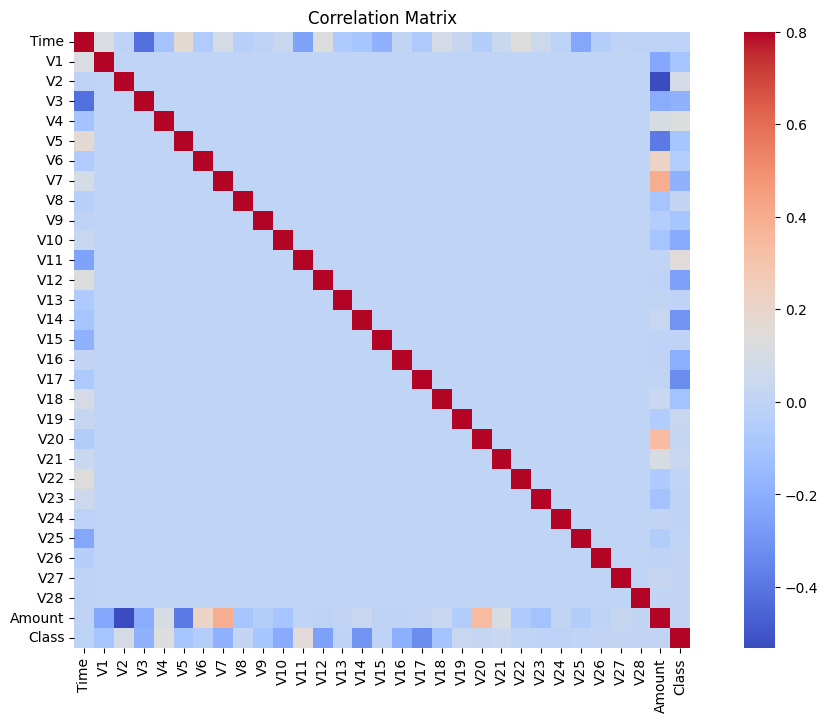

In [9]:

# Correlation matrix 
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap='coolwarm', vmax=0.8, square=True)
plt.title('Correlation Matrix')
plt.show()

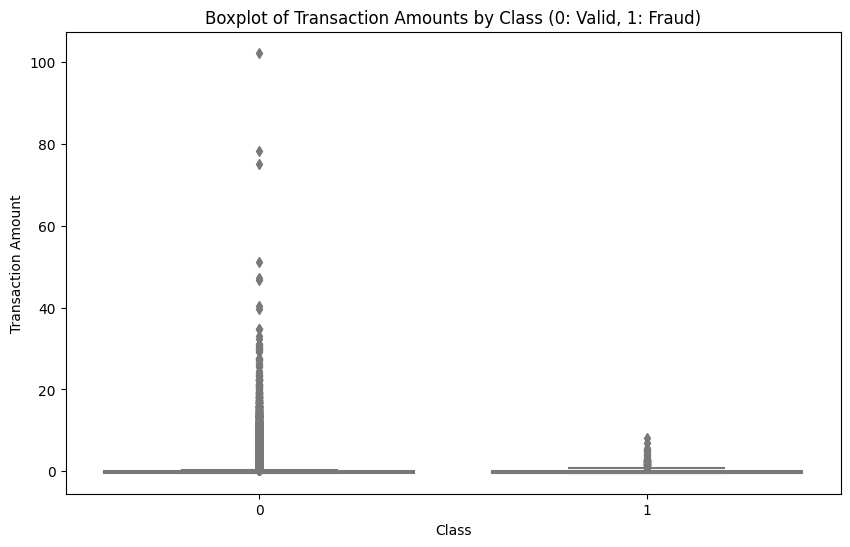

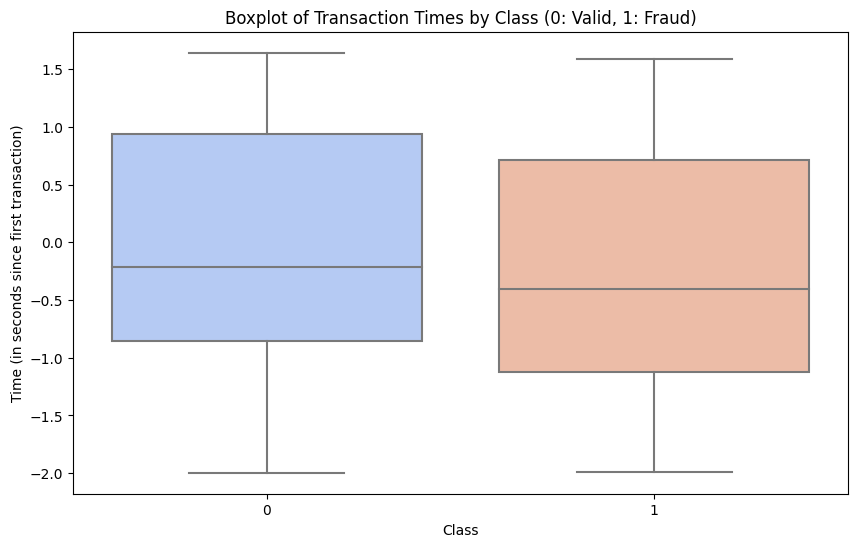

In [10]:
# Boxplot for 'Amount' 
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Amount', data=df, palette='coolwarm')
plt.title('Boxplot of Transaction Amounts by Class (0: Valid, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

# Boxplot for 'Time' 
plt.figure(figsize=(10,6))
sns.boxplot(x='Class', y='Time', data=df, palette='coolwarm')
plt.title('Boxplot of Transaction Times by Class (0: Valid, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Time (in seconds since first transaction)')
plt.show()

### Models

I will utilize several unsupervised learning models to detect fraud, by treating fraudulent transactions as anomolies wihting the dataset

#### 1. Isolation Forest : 

Designed for anomaly detection, works by isolating data points in a decision tree like structure.

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Classification Report for Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



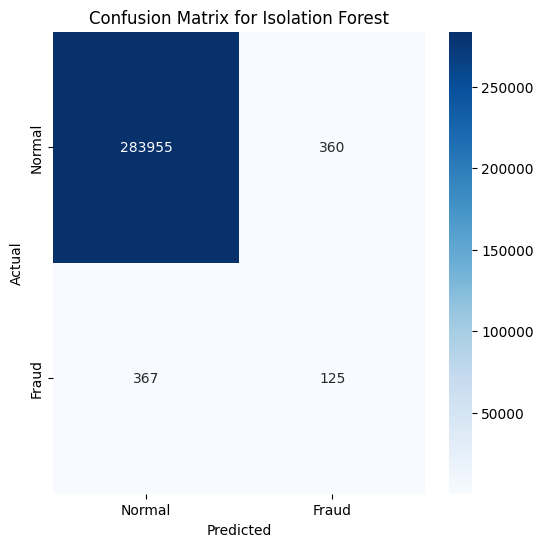

In [11]:

# Initialize model
iso_forest = IsolationForest(contamination=0.0017, random_state=42)

# Fit the model on dataset
iso_forest.fit(X)

# Predict anomalies 
y_pred_iso = iso_forest.predict(X)

# Convert prediction results: anomalies as 1, normal as 0
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# Actual fraud labels
y_true = df['Class']

# Evaluate model performance
print("Classification Report for Isolation Forest:")
print(classification_report(y_true, y_pred_iso))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_iso)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix for Isolation Forest")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### 2. One-Class SVM :

Support vector machine model that aims to identify the normal class and detect outliers. 

Classification Report for One-Class SVM:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    284315
           1       0.05      0.86      0.09       492

    accuracy                           0.97    284807
   macro avg       0.52      0.91      0.54    284807
weighted avg       1.00      0.97      0.98    284807



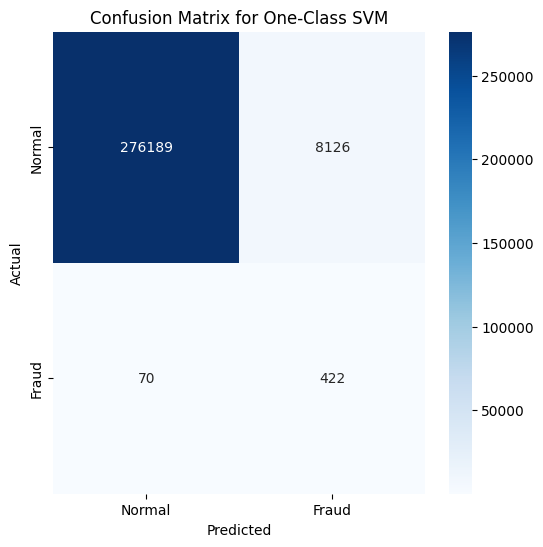

In [11]:

# Initialize model
oc_svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

# Fit the model on the dataset
oc_svm.fit(X)

# Predict anomalies
y_pred_svm = oc_svm.predict(X)
y_pred_svm = [1 if x == -1 else 0 for x in y_pred_svm]

# Evaluate model
print("Classification Report for One-Class SVM:")
print(classification_report(y_true, y_pred_svm))

# Confusion matrix 
conf_matrix_svm = confusion_matrix(y_true, y_pred_svm)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix for One-Class SVM")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### 3. DBSCAN :

A density-based clustering model, detects outliers based on the density of data points in a given neighborhood.

Classification Report for DBSCAN:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40    284315
           1       0.00      0.98      0.00       492

    accuracy                           0.25    284807
   macro avg       0.50      0.61      0.20    284807
weighted avg       1.00      0.25      0.40    284807



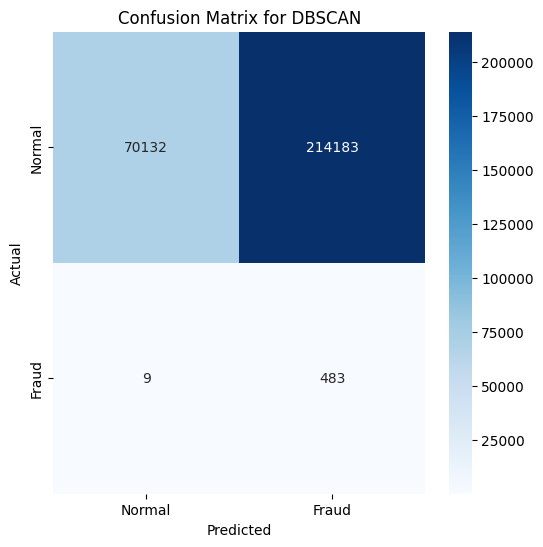

In [12]:

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit and predict clusters 
y_pred_dbscan = dbscan.fit_predict(X)
y_pred_dbscan = [1 if x == -1 else 0 for x in y_pred_dbscan]

# Evaluate model
print("Classification Report for DBSCAN:")
print(classification_report(y_true, y_pred_dbscan))

# Confusion matrix 
conf_matrix_dbscan = confusion_matrix(y_true, y_pred_dbscan)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_dbscan, annot=True, fmt="d", cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix for DBSCAN")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

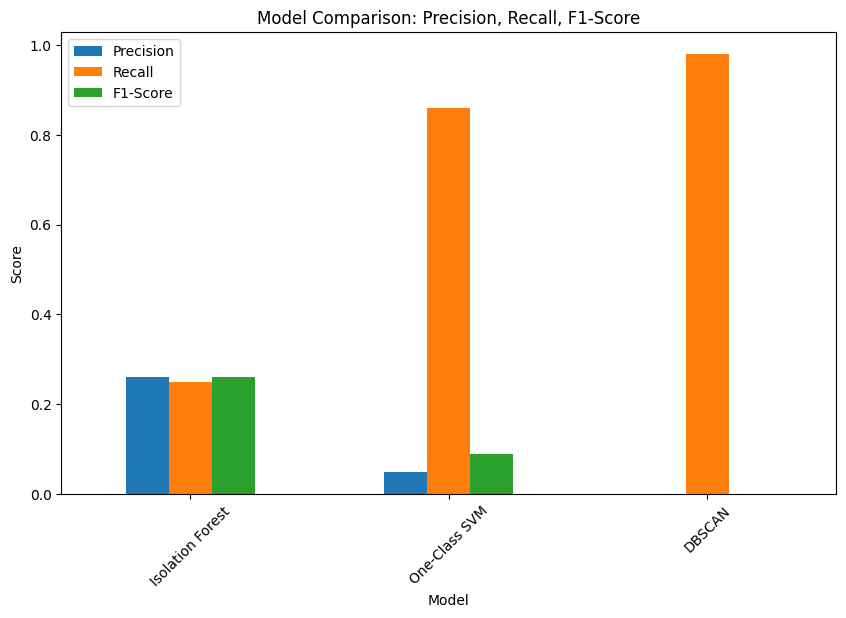

In [16]:
# metrics from the classification reports
results = pd.DataFrame({
    'Model': ['Isolation Forest', 'One-Class SVM', 'DBSCAN'],
    'Precision': [0.26, 0.05, 0.00],  # Example values, extract them from the classification reports
    'Recall': [0.25, 0.86, 0.98],
    'F1-Score': [0.26, 0.09, 0.00]
})

# Plot to compareof models based on precision, recall, F1-Score
fig, ax = plt.subplots(figsize=(10,6))
results.set_index('Model').plot(kind='bar', ax=ax)
plt.title('Model Comparison: Precision, Recall, F1-Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

### Discussion

- Isolation Forest performs well in terms of accuracy, as it successfully detects the majority of non-fraudulent transactions. However, its precision and recall for detecting fraud are lower, indicating that it misclassifies some frauds and fails to identify others. 

- One-Class SVM demonstrates better recall for fraud detection, capturing more fraudulent transactions. However, it has a much lower precision and F1-score, meaning many false positives are being classified as fraud.

- DBSCAN performs poorly for this dataset. Its recall is high, but precision is very low, leading to many false positives. This model may not be well-suited for high-dimensional datasets like this one, or it may require fine-tuning 


### Potential Improvements: 
- Applying techniques like oversampling the minority class (fraud cases) or undersampling the majority class could improve the performance of these models, especially in terms of recall.

- The results of all models could be improved through grid search and cross-validation for hyperparameter tuning

### Conclusion

This project showcases the application of three different unsupervised learning models for detecting fraudulent transactions. Isolation Forest strikes a balance between detecting anomalies with fewer false positives, but its fraud recall needs improvement. One-Class SVM provides better fraud recall but at the cost of many false positives, while DBSCAN struggles with high-dimensional data in this case. With hyperparameter tuning and possibly addressing the class imbalance, the performance of these models can be further optimized.


